<h5 align="left">
<B>Name :- Arun M
<br>Reg No :- 23122110
<br>Class :- 3MScDS B 
</B>
</h5>

<h1 align="center"><b><i>Water Quality Classification Using KNN</i></b></h1>
<h3 align="center">Dataset Used :- <a href="https://www.kaggle.com/datasets/adityakadiwal/water-potability">Click Here</a></h3><p>In this project, we aim to classify the potability of water samples using the K-Nearest Neighbors (KNN) algorithm. Ensuring safe and potable water is crucial for public health, and machine learning techniques can provide valuable insights and predictions about water quality based on various chemical and physical attributes.

By utilizing a dataset from Kaggle, we preprocess the data, standardize the features, and explore the optimal parameters for the KNN model. The KNN algorithm is a simple yet effective method for classification tasks, making it an ideal choice for this water quality classification problem. Through cross-validation and parameter tuning, we aim to achieve a robust model that can accurately predict whether a given water sample is drinkable or not.
</p>
<p><b><i>Credits :- ChatGPT(For Commenting and Understanding Bugs)</i></b></p>
<p><b><i>References :-<a href="https://www.elastic.co/what-is/knn">Elastic</a</i></b></p>

In [1]:
#Importing All Libraries
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#Reaading the Dataset
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#Checking is there any Missing Values
missing_values = df.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
#Replacing the Numerical rows if there is any Missing Values in that entire Column
def replace_NAN(d):
    missing_values = d.isnull().sum()
    means = d.mean()
    for col in d.columns:
        if missing_values[col] > 0:
            d[col].fillna(means[col], inplace=True)
    return d

In [5]:
#Printing the Average of all Columns
means = df.mean()
print(means)

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64


In [6]:
df = replace_NAN(df)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [8]:
#Descriptive Statistics
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


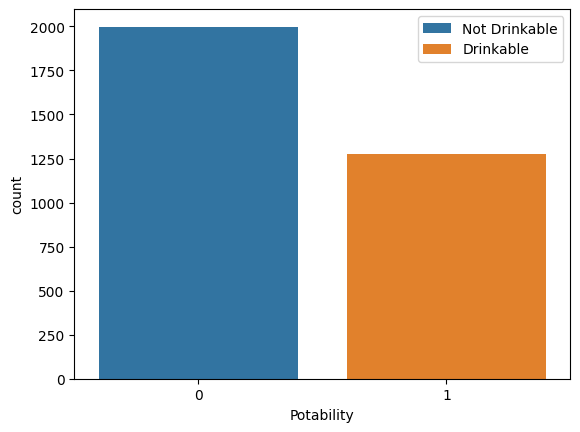

In [9]:
# Create a count plot for 'Potability', with different colors for each category.
sns.countplot(data=df, x='Potability', hue='Potability')

# Set custom legend labels: 'Not Drinkable' and 'Drinkable'.
plt.legend(labels=['Not Drinkable', 'Drinkable'])


<Axes: >

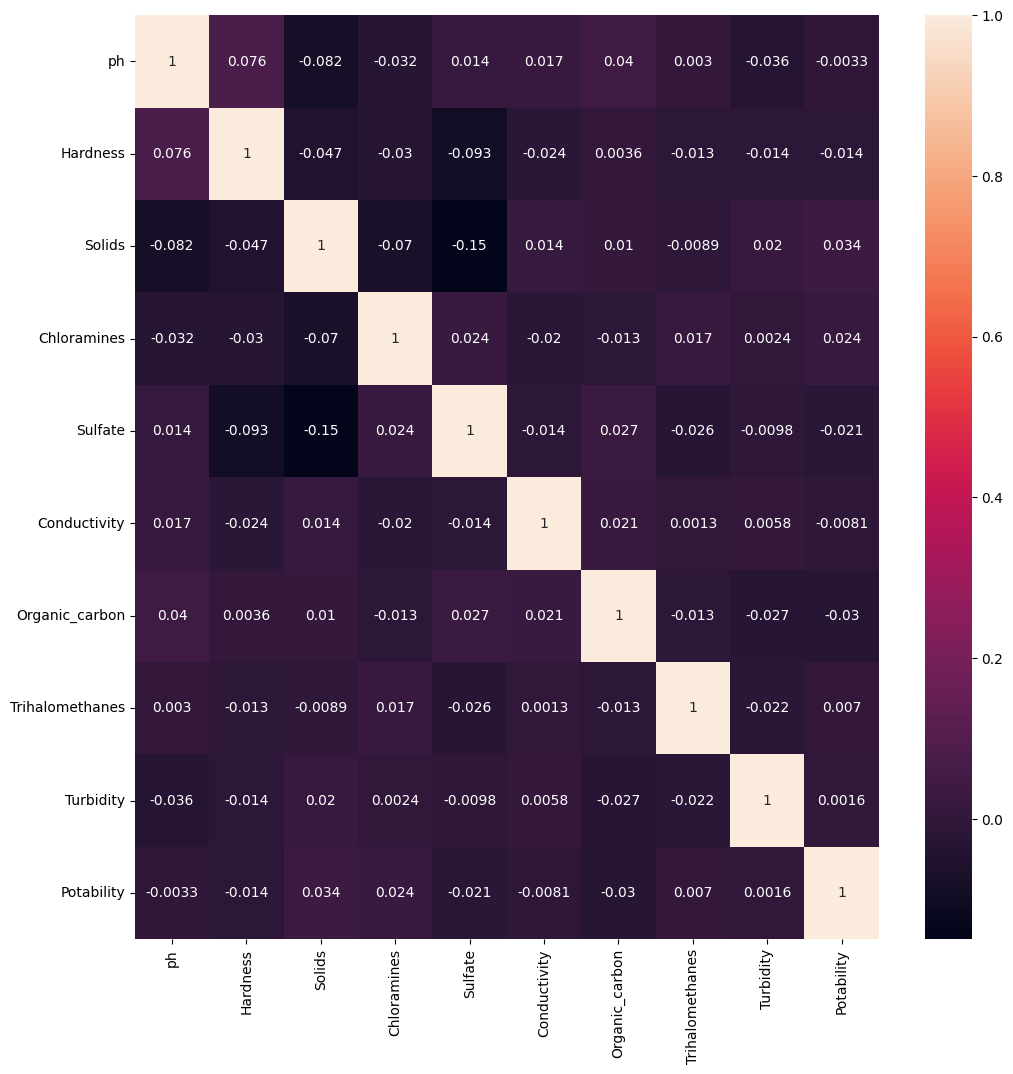

In [10]:
# Calculate the correlation matrix for the DataFrame 'df'.
cor = df.corr()

# Create a new figure for the plot with a size of 12x12 inches.
plt.figure(figsize=(12, 12))

# Create a heatmap of the correlation matrix.
# annot=True adds the correlation coefficient values to the heatmap cells.
sns.heatmap(cor, annot=True)


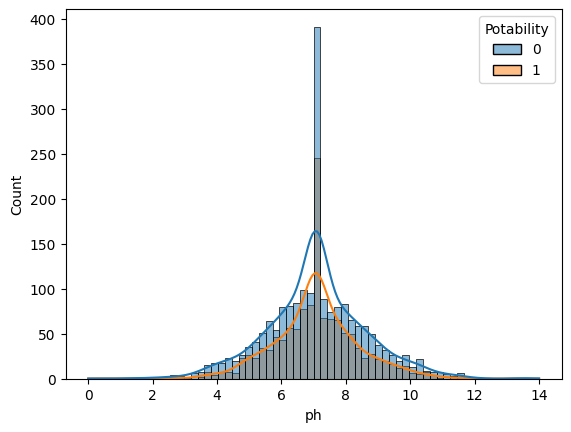

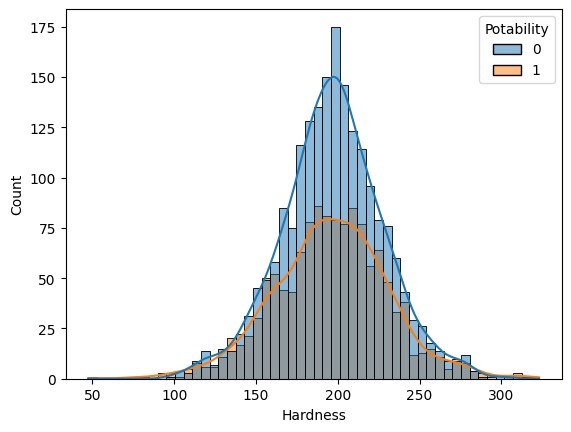

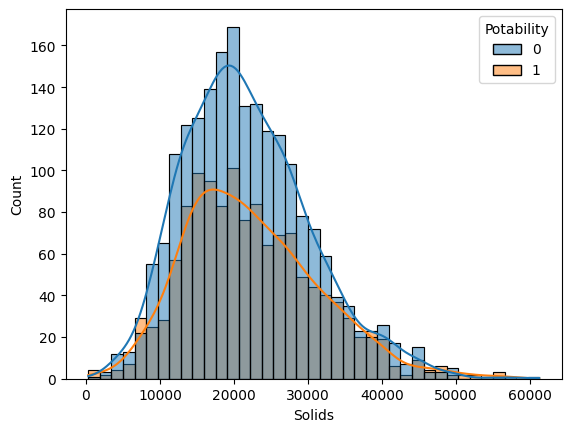

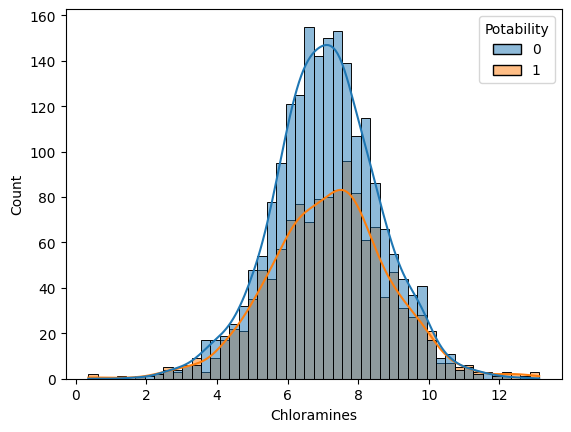

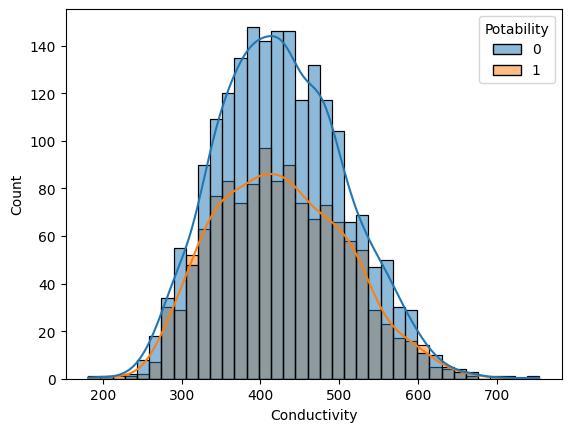

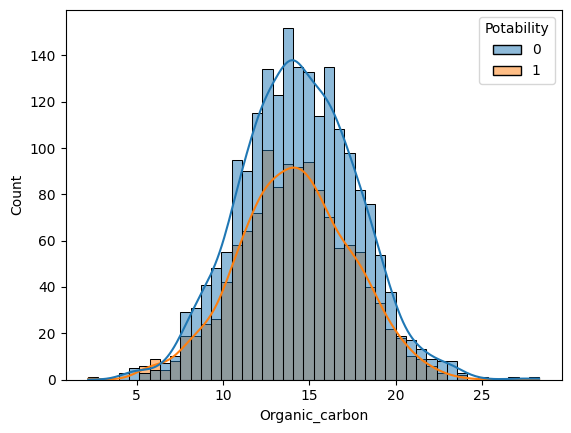

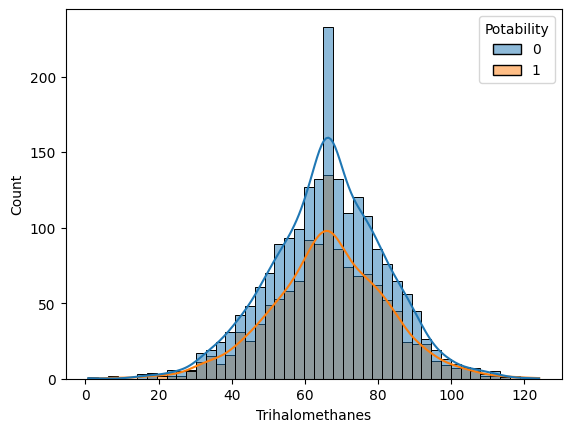

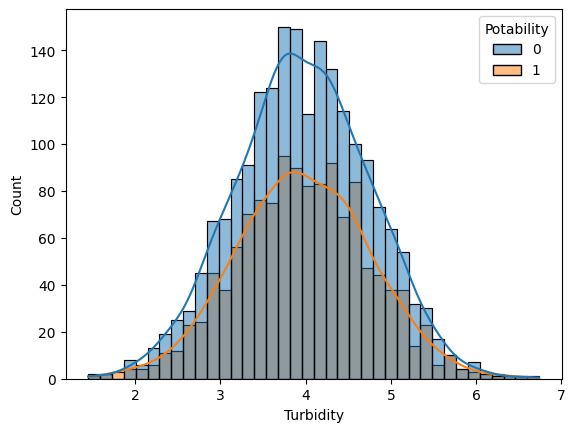

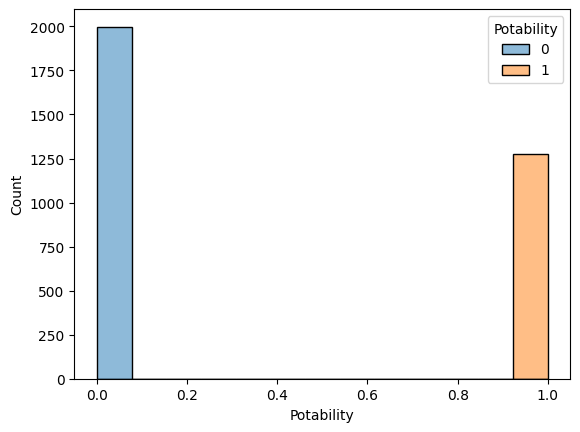

In [23]:
# Loop through each column in the DataFrame.
for col in df.columns:
    # Create a histogram with a kernel density estimate (kde) for each column, colored by 'Potability'.
    sns.histplot(data=df, x=col, kde=True, hue='Potability')
    # Show the plot.
    plt.show()


              precision    recall  f1-score   support

           0       0.67      0.77      0.71       405
           1       0.50      0.38      0.43       251

    accuracy                           0.62       656
   macro avg       0.58      0.57      0.57       656
weighted avg       0.60      0.62      0.61       656



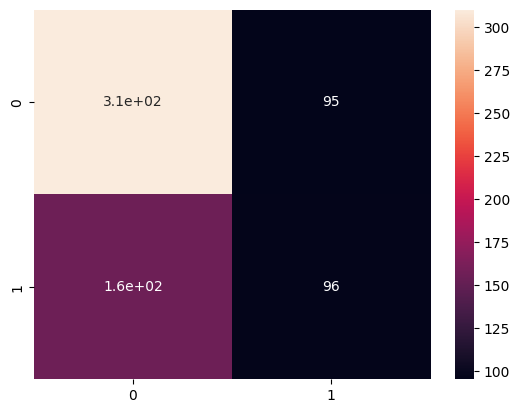

In [12]:
#Most of the attributes follow normal distribution 

def train_eval(data):

        # Shuffle the data and separate features (data_x) and target (data_y).
    data = data.sample(frac=1)
    data_x = data.iloc[:, :-1]
    data_y = data.iloc[:, -1]
    
    # Standardize the features.
    scaler = StandardScaler()
    data_x = pd.DataFrame(scaler.fit_transform(data_x), columns=data_x.columns)
    
    # Split the data into training and testing sets.
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=41)
    
    # Train the KNeighborsClassifier model.
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    
    # Evaluate the model.
    predictions = model.predict(x_test)
    report = classification_report(y_test, predictions)
    print(report)
    
    # Plot the confusion matrix.
    matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(matrix, annot=True)

# Call the function with the DataFrame 'df'.
train_eval(df)


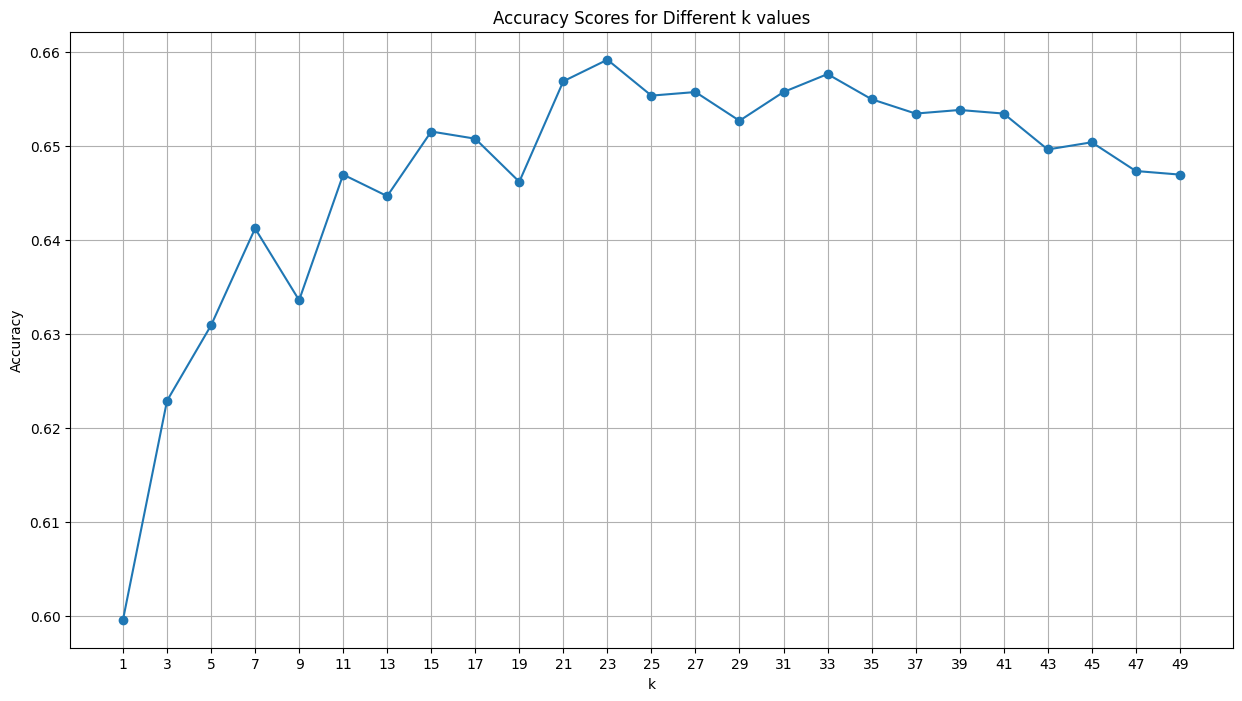

In [13]:
# Shuffle the data and separate features (data_x) and target (data_y).
data = df.sample(frac=1)
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1]

# Standardize the features.
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns=data_x.columns)

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=41)

# List of odd k values from 1 to 50.
k_values = list(range(1, 51, 2))
accu = []

# Evaluate KNeighborsClassifier for each k using cross-validation.
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(m, x_train, y_train, cv=10, scoring='accuracy')
    accu.append(scores.mean())

# Plot accuracy scores versus k values.
plt.figure(figsize=(15, 8))
plt.plot(k_values, accu, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy Scores for Different k values')
plt.grid(True)
plt.show()


In [14]:
df = df.drop(columns = 'Sulfate', axis =1 )
df.head(5)

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


              precision    recall  f1-score   support

           0       0.64      0.73      0.68       393
           1       0.48      0.38      0.42       263

    accuracy                           0.59       656
   macro avg       0.56      0.55      0.55       656
weighted avg       0.57      0.59      0.58       656



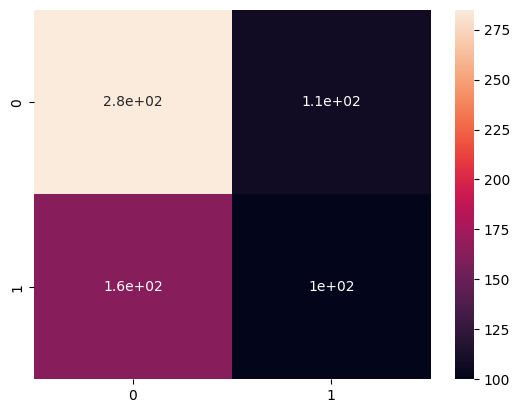

In [15]:
train_eval(df)

<Axes: xlabel='Potability', ylabel='count'>

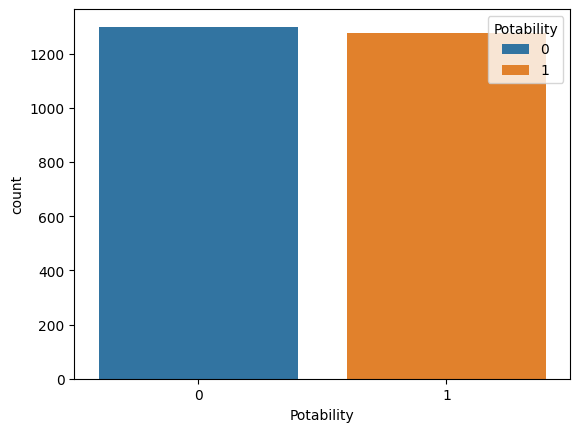

In [16]:
#Lets tackle class imbalance problem, by downsampaling not drinkable instances(np)

p = data[data['Potability']==1]
not_p = data[data['Potability']==0]
sampled_data = not_p.sample(n=1300)

#Shuffle the sampled data
data_new = pd.concat([p, sampled_data], axis =0)
#shuffle
s_data = data_new.sample(frac=1)
s_data.head()

sns.countplot(data=s_data, x= 'Potability', hue= 'Potability')


              precision    recall  f1-score   support

           0       0.56      0.61      0.58       251
           1       0.59      0.55      0.57       265

    accuracy                           0.58       516
   macro avg       0.58      0.58      0.58       516
weighted avg       0.58      0.58      0.58       516



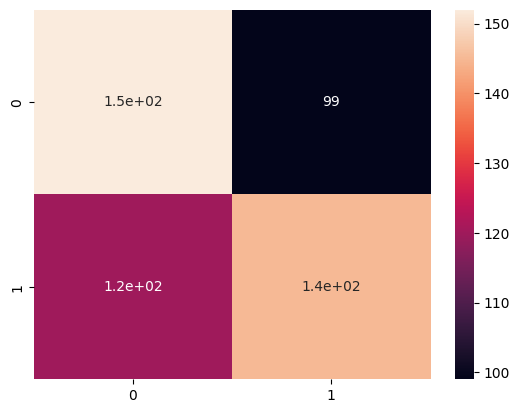

In [17]:
train_eval(s_data)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       395
           1       0.54      0.46      0.50       261

    accuracy                           0.63       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.62      0.63      0.62       656



<Axes: >

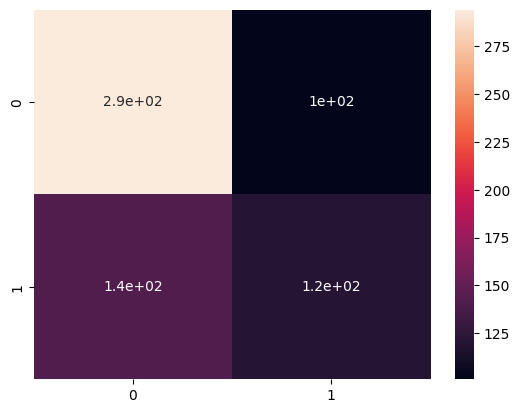

In [18]:
data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)

#model creation
model = KNeighborsClassifier(metric = 'cosine')
model.fit(x_train, y_train)

#evaluation
predictions = model.predict(x_test)
report = classification_report(y_test, predictions)
print(report)
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot= True)

(2011, 10)


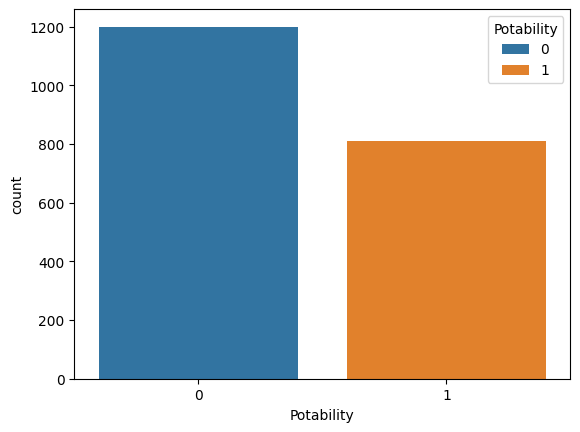

In [20]:
# Lets try dropping all the rows with missing values 
data = pd.read_csv('water_potability.csv')
data.dropna(inplace =True)

sns.countplot(data=data, x = 'Potability', hue = 'Potability' )
print(data.shape)

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       234
           1       0.58      0.46      0.51       169

    accuracy                           0.64       403
   macro avg       0.62      0.61      0.61       403
weighted avg       0.63      0.64      0.63       403



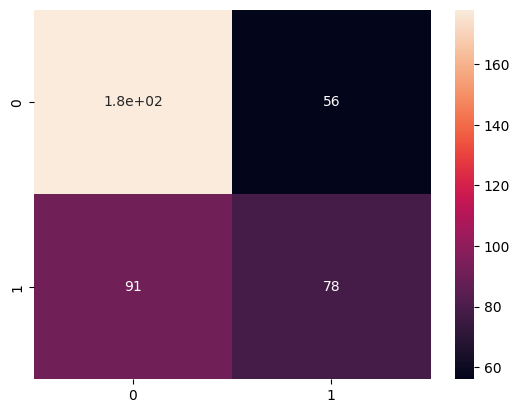

In [21]:
train_eval(data)

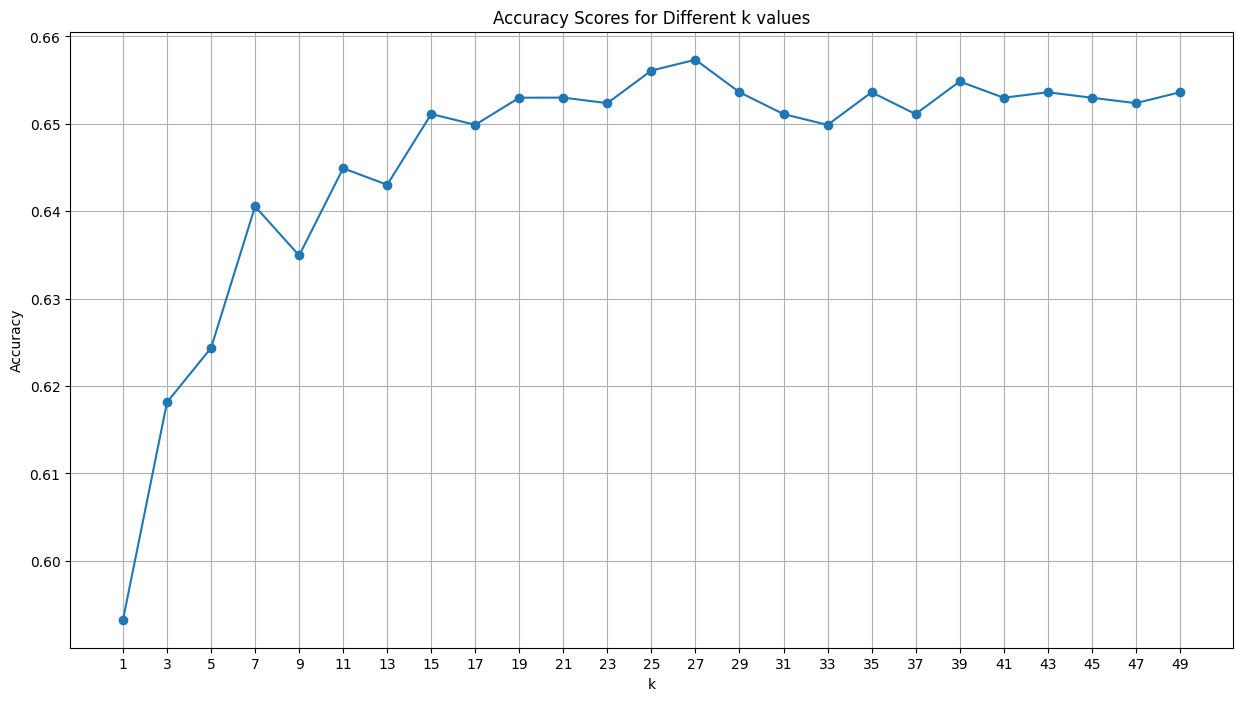

In [22]:
data = data.sample(frac=1)
data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)




k_values = list(range(1,51, 2))
accu = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors =k)
    scores = cross_val_score(m, x_train, y_train, cv=10,  scoring='accuracy')
    accu.append(scores.mean())
    
# Plotting accuracy scores versus k values
plt.figure(figsize =(15,8))
plt.plot(k_values, accu, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy Scores for Different k values')
plt.grid(True)
plt.show()